In [12]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
import matplotlib.pyplot as plt

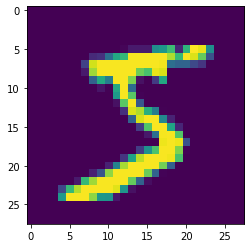

In [16]:
plt.imshow(x_train[0])

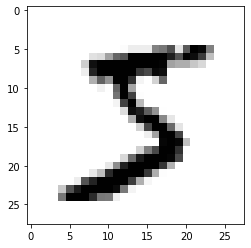

In [17]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [18]:
y_train[0]

5

In [19]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [20]:
x_train = tf.keras.utils.normalize (x_train, axis = 1)                #normalize (divide everything by 255)

In [21]:
x_test = tf.keras.utils.normalize (x_test, axis = 1)

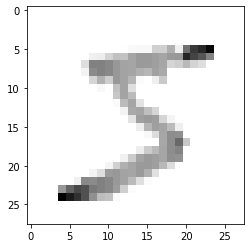

In [22]:
plt.imshow (x_train[0], cmap = plt.cm.binary)

In [23]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [24]:
print(y_train[0])

5


In [25]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)


Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [27]:
###Creating neural network
model = Sequential()

In [28]:
###First convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))## only for first convolution layer to mention input layer size
model.add(Activation("relu")) ##activation funnction
model.add(MaxPooling2D(pool_size=(2,2))) ##Maxpooling

### Second Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### ThirdConvolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Fully connected Layer #1
model.add (Flatten()) # before using fully connected layer, need to be flatten so that 2D to 1D
model.add (Dense(64)) # Dense Layer
model.add(Activation("relu")) 

### Fully connected Layer #2
model.add (Dense(32)) #
model.add(Activation("relu")) 

### Last fully connected layer, output must be equal to number of classes, 10 (0-9)
model.add (Dense(10)) #this last dense layer must be equal to 10
model.add(Activation('softmax')) #activation function is changed to Softmax (Class probabilities) 


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [30]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [31]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [32]:
model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3) ##Training my model

Epoch 1/5
1313/1313 [==============================] - 32s 22ms/step - loss: 0.3486 - accuracy: 0.8895 - val_loss: 0.1339 - val_accuracy: 0.9579
Epoch 2/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.1134 - accuracy: 0.9654 - val_loss: 0.1117 - val_accuracy: 0.9648
Epoch 3/5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0805 - accuracy: 0.9761 - val_loss: 0.0817 - val_accuracy: 0.9747
Epoch 4/5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0610 - accuracy: 0.9812 - val_loss: 0.0782 - val_accuracy: 0.9752
Epoch 5/5
1313/1313 [==============================] - 30s 22ms/step - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.0646 - val_accuracy: 0.9808


In [53]:
### Evaluating on testing data set MNIST
test_loss, test_acc = model.evaluate (x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0618 - accuracy: 0.9824
Test Loss on 10,000 test samples 0.06175241619348526
Validation Accuracy on 10,000 test samples 0.9824000000953674


In [54]:
predictions = model.predict([x_testr])

In [35]:
print(predictions)

[[2.1226388e-07 3.0151525e-05 2.0159281e-05 ... 9.9994373e-01
  4.1484134e-07 3.3029894e-06]
 [5.0899188e-04 1.9134826e-05 9.9940586e-01 ... 3.1997608e-06
  1.2058348e-05 4.5174838e-06]
 [7.5218072e-09 9.9997342e-01 4.2394095e-07 ... 1.7114118e-07
  2.0600773e-05 3.6822377e-07]
 ...
 [8.4596103e-08 1.2585559e-04 4.2991592e-06 ... 8.7277731e-06
  1.8137573e-04 4.2504973e-05]
 [3.2321739e-04 6.1321842e-08 1.6410021e-06 ... 3.0045740e-08
  1.2991013e-03 8.8060669e-06]
 [2.4697624e-04 3.7682221e-06 2.3905840e-04 ... 7.2193536e-09
  2.1278663e-04 7.4281204e-05]]


In [36]:
print(np.argmax(predictions[0]))

7


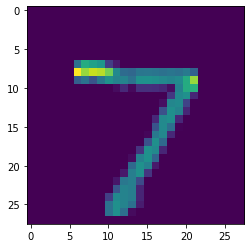

In [37]:
plt.imshow(x_test[0])

In [38]:
## in order to understand, convert the predictions from one hot encoding, we need to use numpy for that
print(np.argmax(predictions[128])) ## so actually argmax will return the maximum value index and find the value of it

8


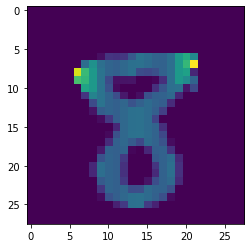

In [39]:
plt.imshow(x_test[128])

In [40]:
import cv2

In [57]:
img = cv2.imread('3.png')

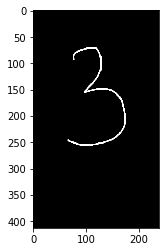

In [58]:
plt.imshow(img)

In [1]:
img.shape

NameError: name 'img' is not defined

In [60]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(413, 239)

In [61]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [62]:
resized.shape

(28, 28)

In [63]:
newimg = tf.keras.utils.normalize (resized, axis = 1)

In [64]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [65]:
newimg.shape

(1, 28, 28, 1)

In [66]:
predictions = model.predict(newimg)

In [73]:
print(np.argmax(predictions))

3


In [91]:
model.save('handwritting')

INFO:tensorflow:Assets written to: handwritting\assets
